In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import datetime as dt

In [6]:
from collections import Counter

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
from mpl_toolkits import mplot3d

# Loading Data

In [10]:
XRP_Increase = pd.read_csv('../XRP_5min_Increase_SmallAmount_5min.csv')
XRP_Decrease = pd.read_csv('../XRP_5min_Decrease_SmallAmount_5min.csv')

In [11]:
original_columns = ['datetime_real','date','close','high','low','open','quoteVolume','volume','weightedAverage']

In [12]:
max_time = 3456789123

In [13]:
XRP_Increase[original_columns].head(2)

,datetime_real,date,close,high,low,open,quoteVolume,volume,weightedAverage
0,2017-05-04 06:20:00,1493875200,0.069288,0.069960,0.069288,0.069960,163.538132,11.431388,0.069900
1,2017-05-04 06:25:00,1493875500,0.069100,0.069949,0.069000,0.069949,113714.544855,7909.709770,0.069558


In [14]:
[d for d in XRP_Decrease.columns if 'decrease' in d.lower()]

['Decrease_0.1_percent',
 'Decrease_0.2_percent',
 'Decrease_0.3_percent',
 'Decrease_0.4_percent',
 'Decrease_0.5_percent',
 'Decrease_0.6_percent',
 'Decrease_0.8_percent',
 'Decrease_1.0_percent',
 'Decrease_1.2_percent',
 'Decrease_1.5_percent']

In [15]:
XRP_Decrease.head()

,Unnamed: 0,Unnamed: 0.1,close,date,high,low,open,quoteVolume,volume,weightedAverage,...,Decrease_0.1_percent,Decrease_0.2_percent,Decrease_0.3_percent,Decrease_0.4_percent,Decrease_0.5_percent,Decrease_0.6_percent,Decrease_0.8_percent,Decrease_1.0_percent,Decrease_1.2_percent,Decrease_1.5_percent
0,12736,12736,0.069288,1493875200,0.069960,0.069288,0.069960,163.538132,11.431388,0.069900,...,1493875500,1493875500,1493875500,1493875500,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800
1,12737,12737,0.069100,1493875500,0.069949,0.069000,0.069949,113714.544855,7909.709770,0.069558,...,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800
2,12738,12738,0.068000,1493875800,0.069100,0.067500,0.069000,220670.240024,15126.256548,0.068547,...,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100
3,12739,12739,0.068465,1493876100,0.068465,0.066432,0.067800,271144.858354,18298.825581,0.067487,...,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123
4,12740,12740,0.068646,1493876400,0.068646,0.067517,0.067802,595249.214904,40678.358104,0.068338,...,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123


### Different stages of the life of XRP

1507374600 1511274300
1512774600 1515174000
1515174300 1518174000
1547873100 1550872800


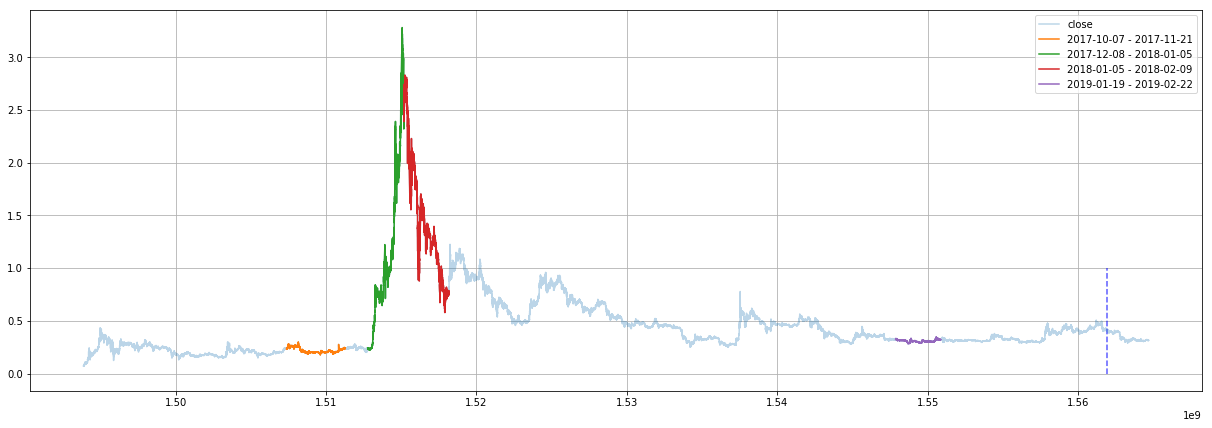

In [16]:
ploting_breakdown = XRP_Increase

plt.figure(figsize= (21,7))


tran_y_low = ploting_breakdown['low']
tran_y_high = ploting_breakdown['high']
tran_y_close = ploting_breakdown['close']

tran_x = ploting_breakdown['date']


# plt.plot(tran_x, tran_y_low, alpha = 0.1)
# plt.plot(tran_x, tran_y_high , alpha  = 0.1)

plt.plot(tran_x, tran_y_close, alpha  = 0.3)


# start = 45000
# dealta_t = 10000
time_section = {45000 : 13000,
                63000 : 8000 ,
                71000 : 10000,
                180000: 10000}  # start // delta_t


for key, val in time_section.items():
    xrp_part = ploting_breakdown[ key :   key + val ]
    xrp_y = xrp_part['close']
    xrp_date = xrp_part['date']

    plt.plot(xrp_date, xrp_y, alpha  = 1, label = '{0} - {1}'.format(xrp_part['datetime_real'].min().split(' ')[0],
                                                                     xrp_part['datetime_real'].max().split(' ')[0]))

    
    print(xrp_part['date'].min(), xrp_part['date'].max() )
    plt.vlines(1561935900, 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')
    
plt.legend()
plt.grid()

In [17]:
XRP_Analysis_table = XRP_Increase[original_columns].copy()

In [18]:
XRP_Analysis_table['20min_RA_on_Close'] = XRP_Analysis_table['close'].rolling(4).mean().shift(1)
XRP_Analysis_table['1H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(12).mean().shift(1)
# XRP_Analysis_table['2H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(24).mean().shift(1)
XRP_Analysis_table['4H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(48).mean().shift(1)
XRP_Analysis_table['12H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(144).mean().shift(1)
XRP_Analysis_table['24H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(288).mean().shift(1)
XRP_Analysis_table['5D_RA_on_Close'] = XRP_Analysis_table['close'].rolling(1440).mean().shift(1)
XRP_Analysis_table['10D_RA_on_Close'] = XRP_Analysis_table['close'].rolling(2880).mean().shift(1)

In [19]:
on_close = [d for d in XRP_Analysis_table.columns if '_on_close' in d.lower()]

In [20]:
on_close

['20min_RA_on_Close',
 '1H_RA_on_Close',
 '4H_RA_on_Close',
 '12H_RA_on_Close',
 '24H_RA_on_Close',
 '5D_RA_on_Close',
 '10D_RA_on_Close']

In [21]:
for close in on_close:
    XRP_Analysis_table['{0}_close_RSM'.format(close.split('_RA_')[0])] = np.sqrt((XRP_Analysis_table['close']- XRP_Analysis_table[close]) **2)
    XRP_Analysis_table['{0}_close_dif'.format(close.split('_RA_')[0])] = (XRP_Analysis_table['close']- XRP_Analysis_table[close] )

In [22]:
[d for d in XRP_Analysis_table.columns if ('close' in d.lower() and 'RA' not in d)]

['close',
 '20min_close_RSM',
 '20min_close_dif',
 '1H_close_RSM',
 '1H_close_dif',
 '4H_close_RSM',
 '4H_close_dif',
 '12H_close_RSM',
 '12H_close_dif',
 '24H_close_RSM',
 '24H_close_dif',
 '5D_close_RSM',
 '5D_close_dif',
 '10D_close_RSM',
 '10D_close_dif']

In [23]:
for [d for d in XRP_Analysis_table.columns if ('close' in d.lower() and 'RA' not in d)]

SyntaxError: invalid syntax (<ipython-input-23-863aa400ee3f>, line 1)

In [ ]:
#XRP_Analysis_table[ ['date']  + [d for d in XRP_Analysis_table.columns if ('close' in d.lower() and 'RA' not in d)]]

In [ ]:
1507374600 1511274300
1512774600 1515174000
1515174300 1518174000
1547873100 1550872800

In [24]:
data_selection_section1 = XRP_Analysis_table[(XRP_Analysis_table['date'] >=1507374600 ) & 
                                    (XRP_Analysis_table['date'] <=1511274300 )][ ['date','close'] + ['1H_close_dif','1H_close_RSM']].reset_index().reset_index()# .set_index('date').plot()

data_selection_section2 = XRP_Analysis_table[(XRP_Analysis_table['date'] >=1512774600 ) & 
                                    (XRP_Analysis_table['date'] <=1516174000 )][ ['date','close'] + ['1H_close_dif','1H_close_RSM']].reset_index().reset_index()# .set_index('date').plot()

data_selection_section3 = XRP_Analysis_table[(XRP_Analysis_table['date'] >=1515174300 ) & 
                                    (XRP_Analysis_table['date'] <=1518174000 )][ ['date','close'] + ['1H_close_dif','1H_close_RSM']].reset_index().reset_index()# .set_index('date').plot()

data_selection_section4 = XRP_Analysis_table[(XRP_Analysis_table['date'] >=1547873100 ) & 
                                    (XRP_Analysis_table['date'] <=1550872800 )][ ['date','close'] + ['1H_close_dif','1H_close_RSM']].reset_index().reset_index()# .set_index('date').plot()

In [25]:
for t in [data_selection_section1,
data_selection_section2,
data_selection_section3,
data_selection_section4]:
    print(len(t))

13000
11333
10000
10000


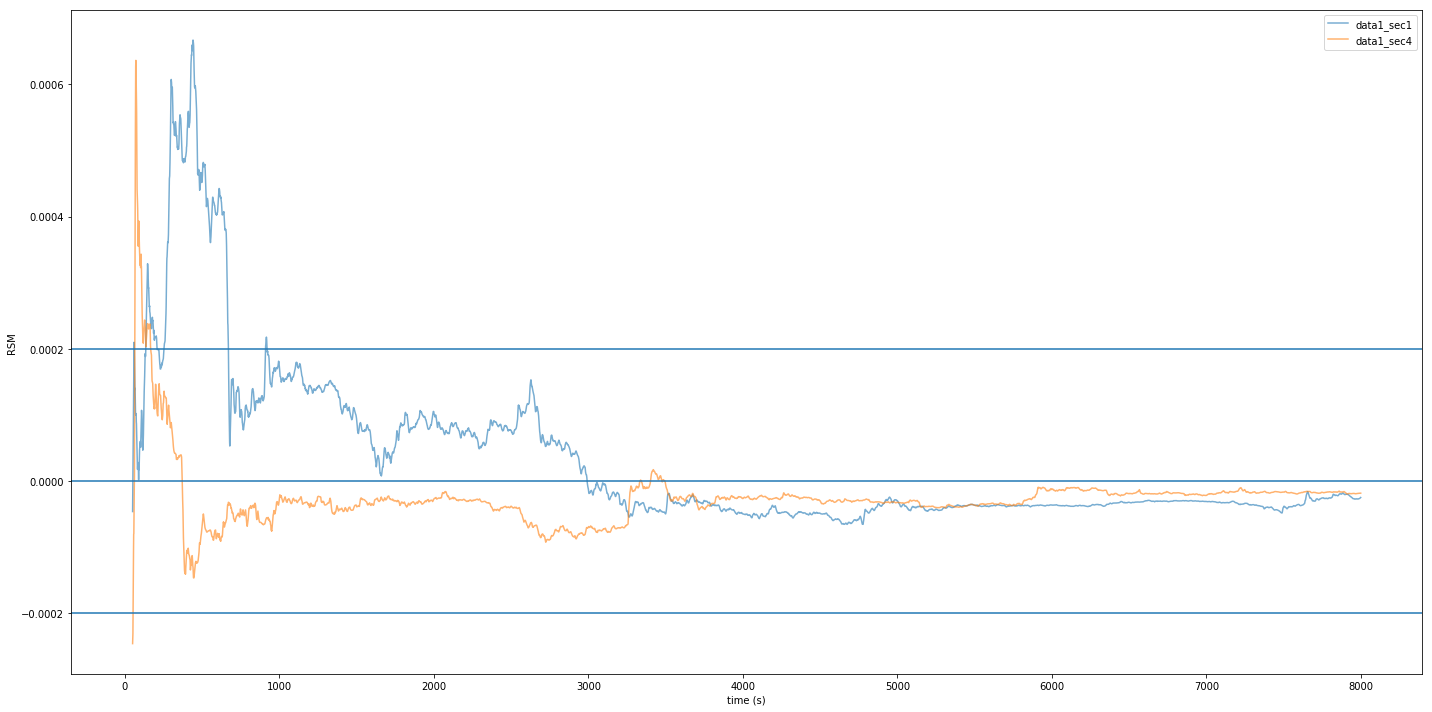

In [48]:
# Create some mock data
t = data_selection_section1[:8000]['level_0']

data1_sec1 = data_selection_section1[:8000]['1H_close_dif'].cumsum()/t
data1_sec2 = data_selection_section2[:8000]['1H_close_dif'].cumsum()/t
data1_sec3 = data_selection_section3[:8000]['1H_close_dif'].cumsum()/t
data1_sec4 = data_selection_section4[:8000]['1H_close_dif'].cumsum()/t

fig, ax1 = plt.subplots(figsize= (20,10))

color1 = 'tab:red'
color1_2 = 'tab:green'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('RSM')
ax1.plot(t[50:], data1_sec1[50:], alpha = 0.6, label = 'data1_sec1')
# ax1.plot(t[50:], data1_sec2[50:], alpha = 0.6, label = 'data1_sec2')
# ax1.plot(t[200:], data1_sec3[200:], alpha = 0.6, label = 'data1_sec3')
ax1.plot(t[50:], data1_sec4[50:], alpha = 0.6, label = 'data1_sec4')


ax1.axhline(0)

ax1.tick_params(axis='y')


# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


# data2 = data_selection['close']
# color2 = 'tab:blue'
# ax2.set_ylabel('XRP', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)


## vertical lines
# ax1.axhline(y=0.0005)
# ax1.axhline(y=-0.0005)

ax1.axhline(y=0.0002)
ax1.axhline(y=-0.0002)



fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.legend()
plt.show()

In [49]:
RSM: 0.0002

## Above 4 graphs shows more profit are made when the market oscillates
- which was suspected 

#### Analysis of the 4 section properties